In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from scipy.ndimage import gaussian_filter, rotate

from scipy import signal

img_fol = '/content/lab3-assignment/images/toy'

img = os.listdir(img_fol)[0]
img = cv2.imread(os.path.join(img_fol, img))
w,h,_ = img.shape



x_train = np.zeros(((len(os.listdir(img_fol))),w, h), dtype = np.float32)
imgs_path = []
for i,img_file in enumerate(sorted(os.listdir(img_fol))):
  #print(img_file)
  imgs_path.append(os.path.join(img_fol, img_file))
  img = cv2.imread(os.path.join(img_fol, img_file))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  
  x_train[i] = img.astype(np.float32)
  #modify images for improvement
  x_train[i] = cv2.GaussianBlur(x_train[i],(5,5),cv2.BORDER_DEFAULT)
  #x_train[i] = cv2.bilateralFilter(x_train[i], 15, 90, 90)
  
  
imgs_path = sorted(imgs_path)

In [2]:


#define functions 
def of_flow(img1, img2, w, min_quality=0.01):


    c1 = cv2.goodFeaturesToTrack(img1, 10000, min_quality, 10)

    w = int(w/2)

    img1 = img1 / 255
    img2 = img2 / 255

    k1 = np.array([[-1, 1], [-1, 1]])
    k2 = np.array([[-1, -1], [1, 1]])
    k3 = np.array([[1, 1], [1, 1]])


    u = np.zeros_like(img1)
    v = u

    dx = signal.convolve2d(img1,  k1)             
    dy = signal.convolve2d(img1,  k2)             
    dt = signal.convolve2d(img2,  k3) - signal.convolve2d(img1,  k3)

    #iterate only c1s
    for c in c1:
            
            j, i = c.ravel()		
            #convert into integers
            i, j = int(i), int(j)		

            d2x = dx[i-w:i+w+1, j-w:j+w+1].flatten()
            d2y = dy[i-w:i+w+1, j-w:j+w+1].flatten()
            d2t = dt[i-w:i+w+1, j-w:j+w+1].flatten()

            B = np.reshape(d2t, (d2t.shape[0],1))
            A = np.vstack((d2x, d2y)).T

            U = np.matmul(np.linalg.pinv(A), B)

            u[i,j] = U[0][0]
            v[i,j] = U[1][0]
 
    return (u,v)

def calc_mag(u, v):
    ct = 0.0
    inc = 3
    total = 0.0

    for i in range(0, u.shape[0], 8):
        for j in range(0, u.shape[1],8):
            fy = v[i,j] * inc
            fx = u[i,j] * inc
            ct += 1
            calc = (fx**2 + fy**2)**0.5
            total += calc

    avg = total / ct

    return avg

def draw_quiver2(u,v,frame,i):
    count =i
    scale = 3
    #ax = plt.figure().gca()
    fig, (ax1) = plt.subplots(1, 1)
    ax1.axis("Off")

    canvas = plt.gca().figure.canvas
    canvas.draw()

    ax1.imshow(frame)
    value = calc_mag(u, v)

    for i in range(0, u.shape[0], 8):
        for j in range(0, u.shape[1],8):
            dy = v[i,j] * scale
            dx = u[i,j] * scale
            calc = (dx**2 + dy**2)**0.5
            if calc > value:
              ax1.quiver(j,i,dx,dy,  angles='xy', scale_units='xy', scale=0.1, color='green')


    plt.draw()
    plt.show()
    plt.axis('off')
    ax1.axis("Off")
    fig.savefig('./temp.jpg', dpi=300, bbox_inches='tight')
    img_frame = cv2.imread('./temp.jpg')
    img_frame = cv2.cvtColor(img_frame, cv2.COLOR_BGR2RGB)
    return img_frame



0 1


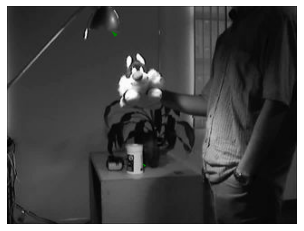

1 2


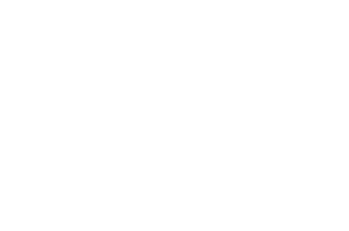

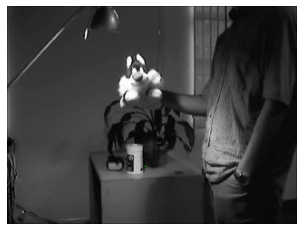

2 3


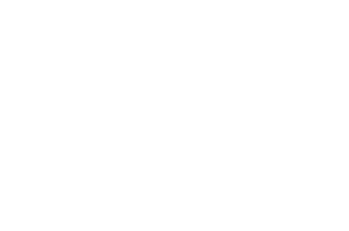

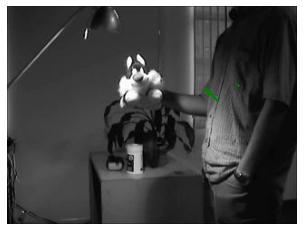

3 4


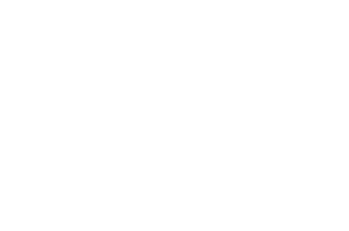

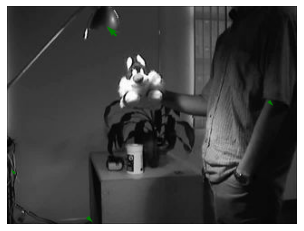

4 5


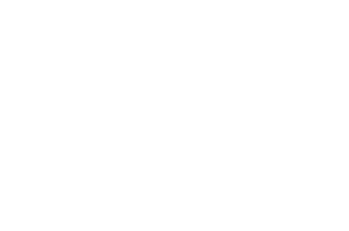

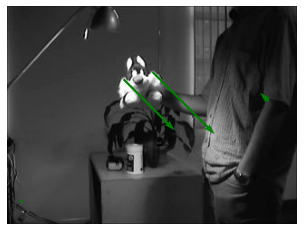

5 6


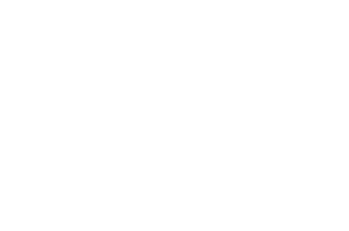

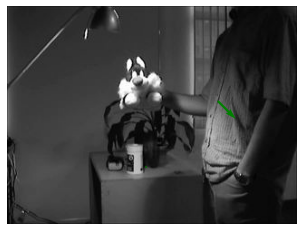

6 7


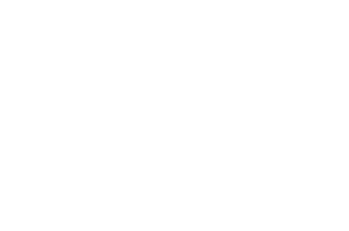

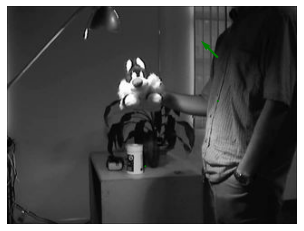

7 8


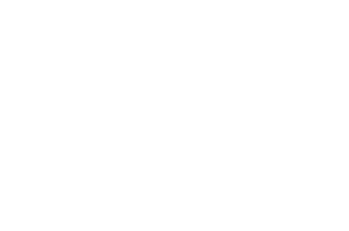

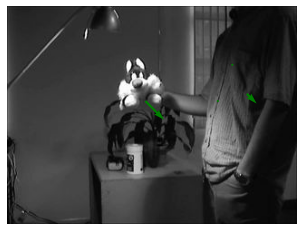

8 9


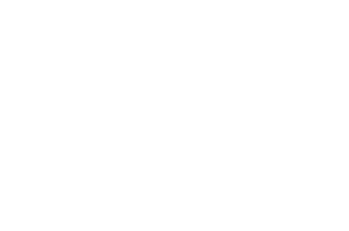

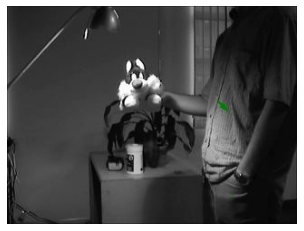

9 10


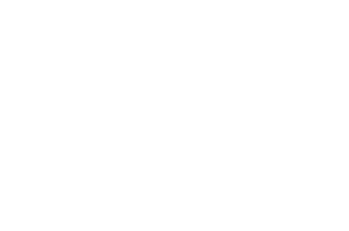

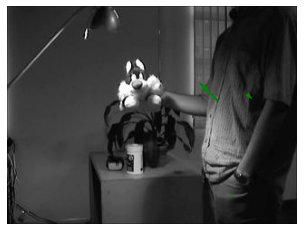

10 11


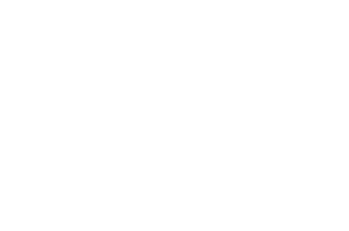

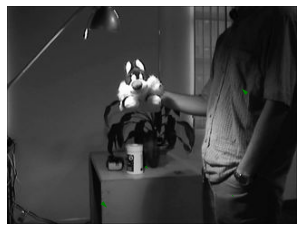

11 12


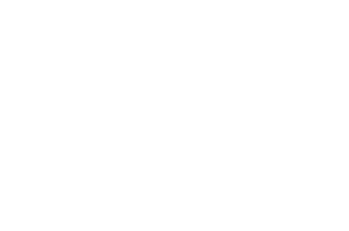

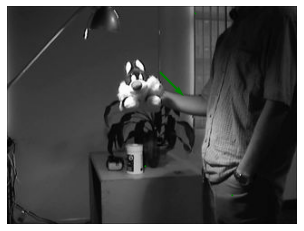

12 13


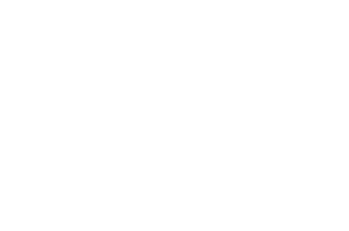

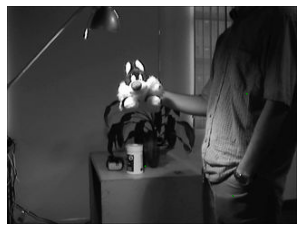

13 14


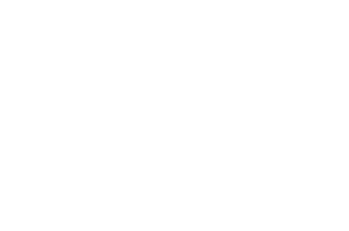

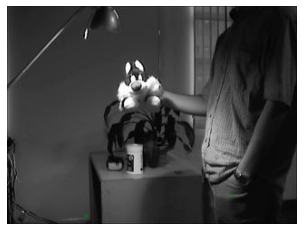

14 15


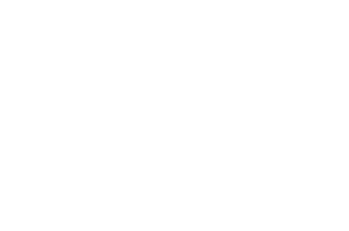

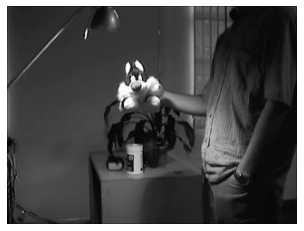

15 16


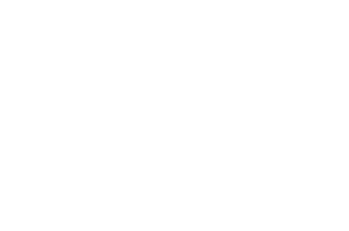

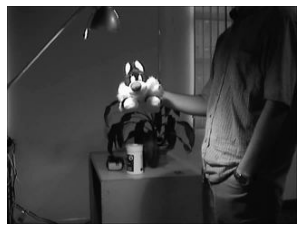

16 17


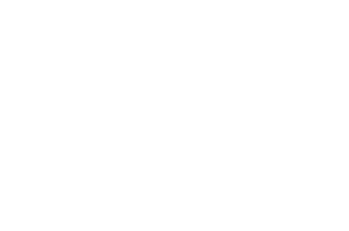

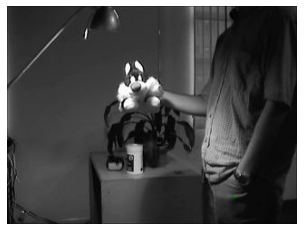

17 18


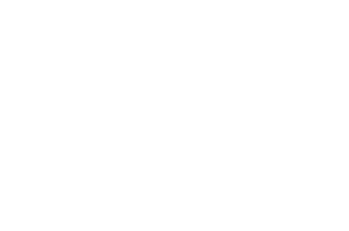

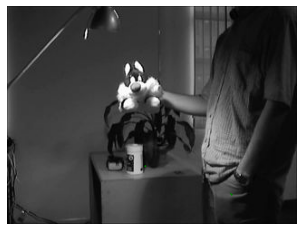

18 19


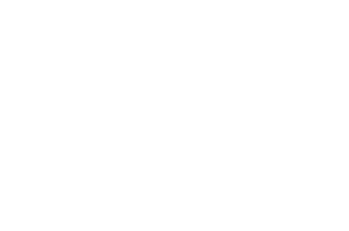

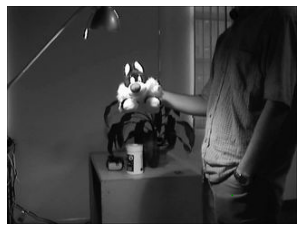

19 20


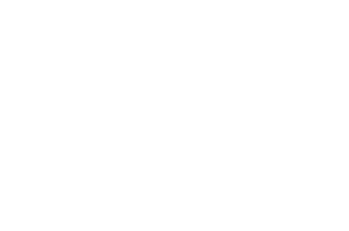

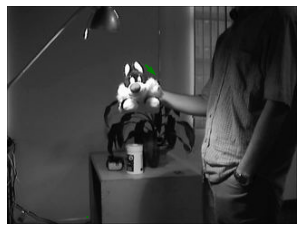

20 21


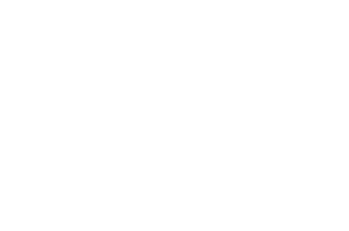

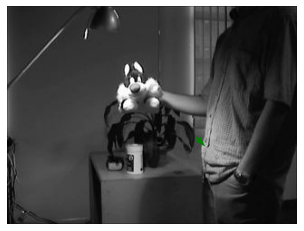

21 22


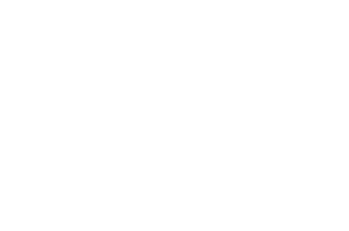

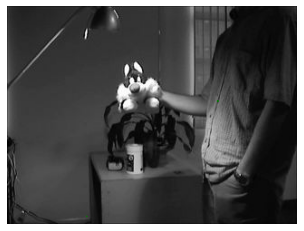

22 23


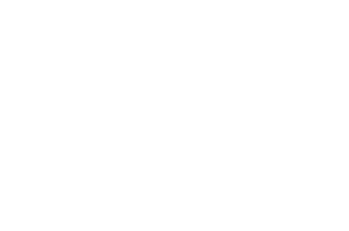

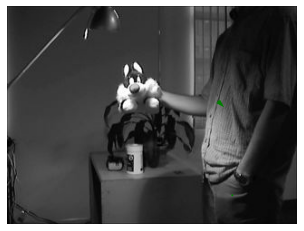

23 24


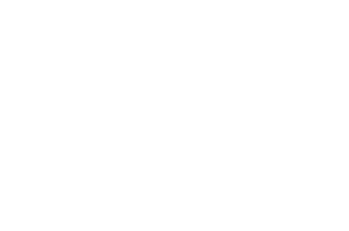

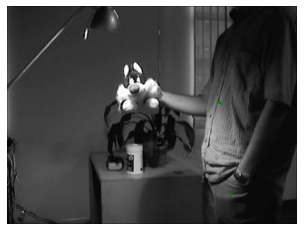

24 25


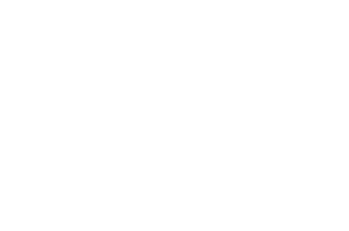

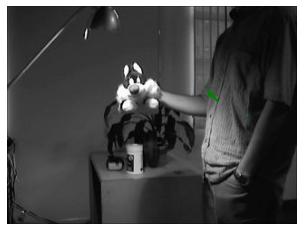

25 26


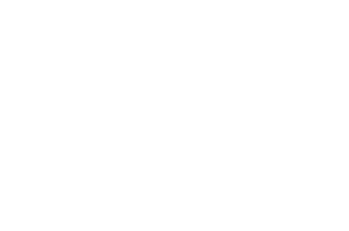

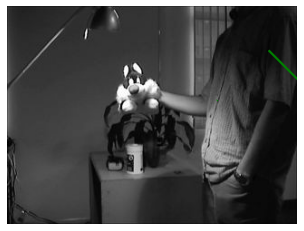

26 27


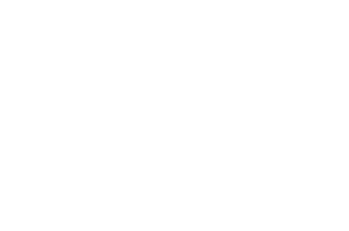

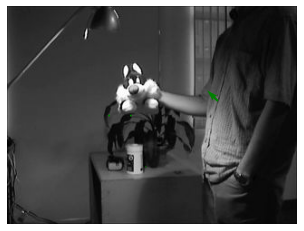

27 28


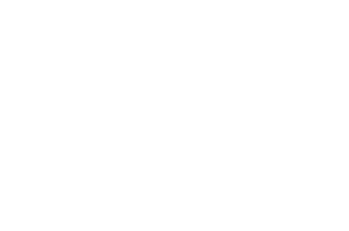

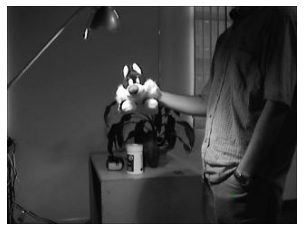

28 29


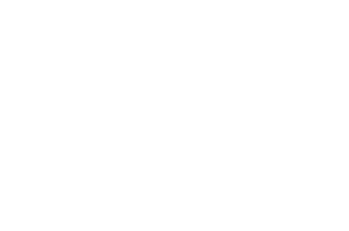

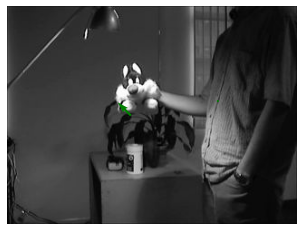

29 30


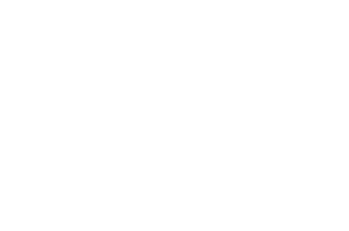

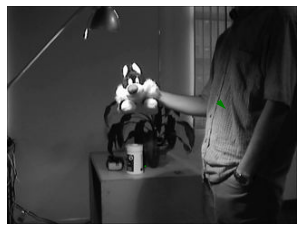

30 31


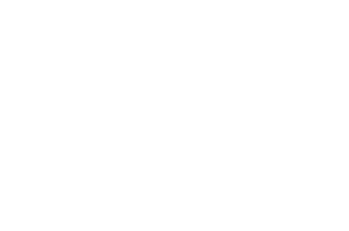

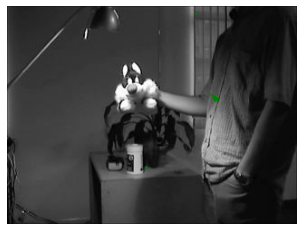

31 32


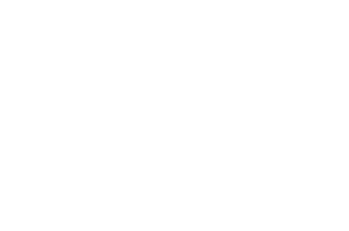

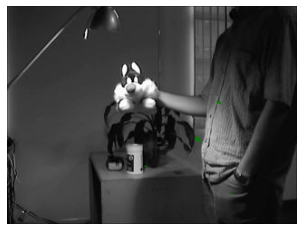

32 33


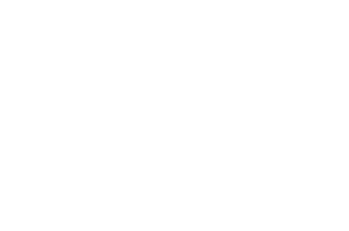

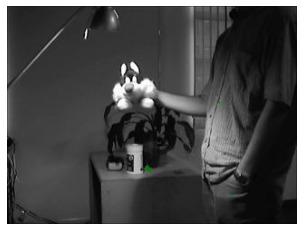

33 34


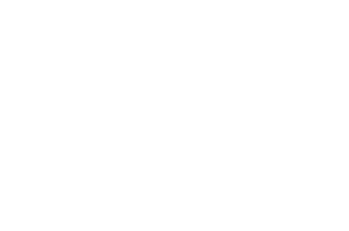

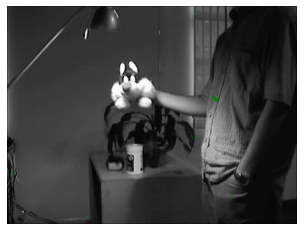

34 35


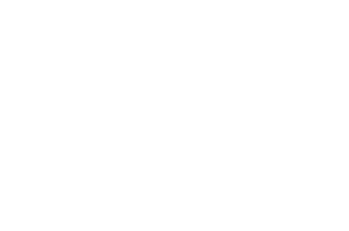

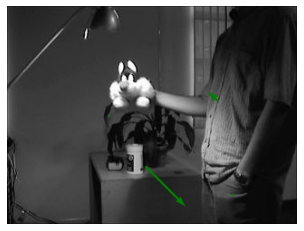

35 36


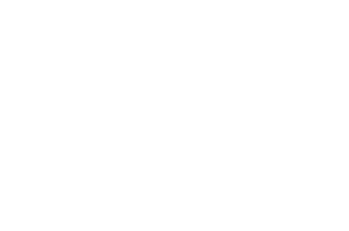

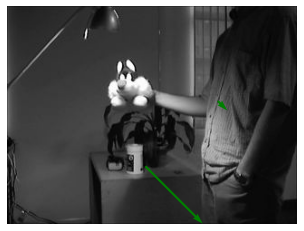

36 37


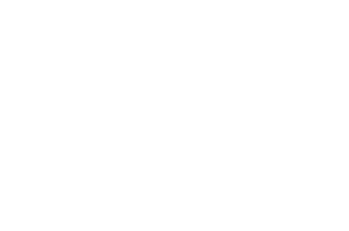

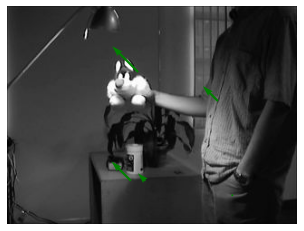

37 38


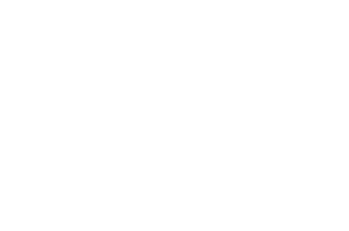

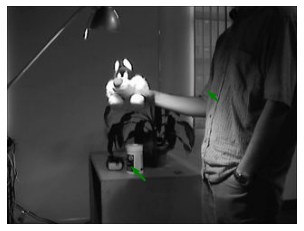

38 39


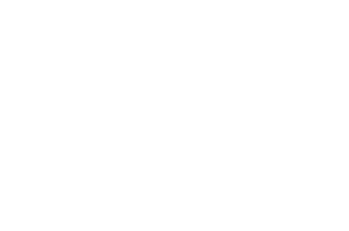

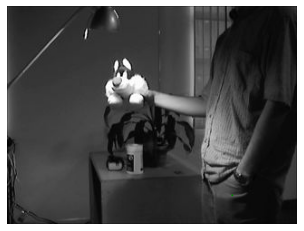

39 40


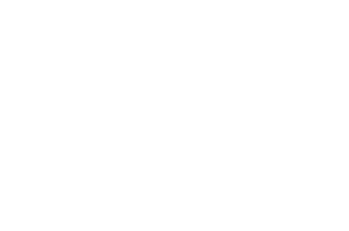

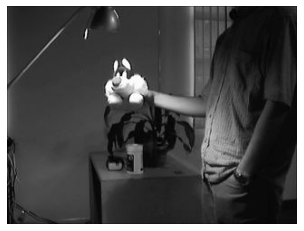

40 41


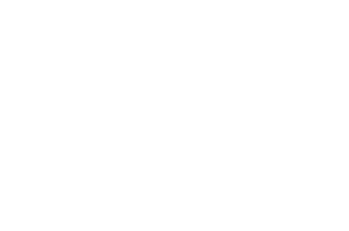

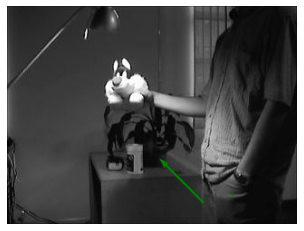

41 42


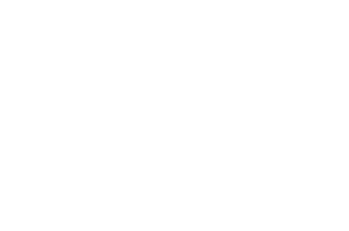

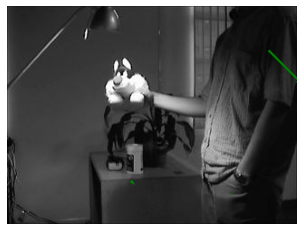

42 43


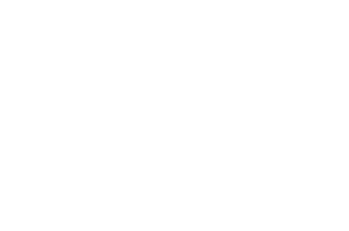

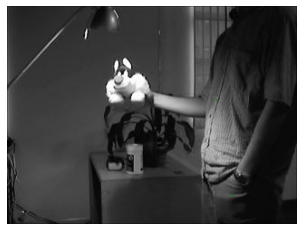

43 44


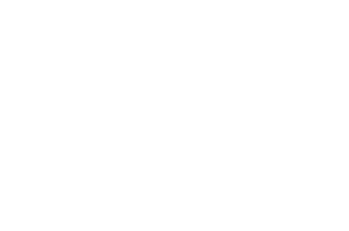

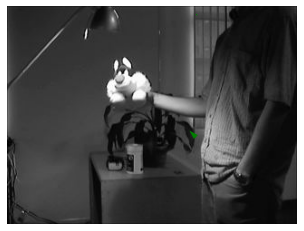

44 45


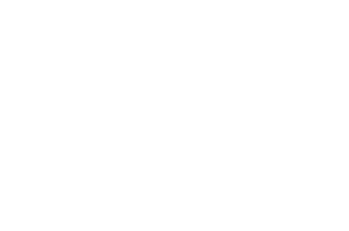

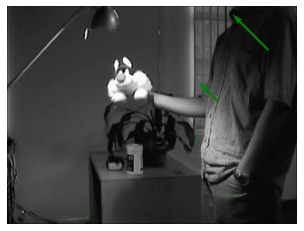

45 46


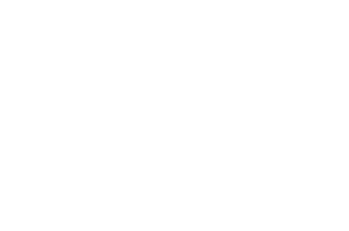

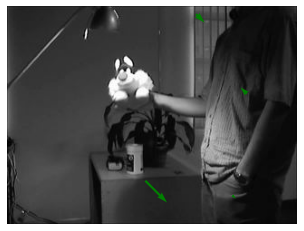

46 47


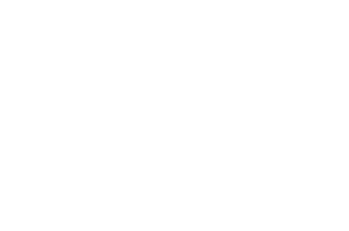

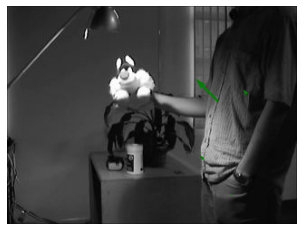

47 48


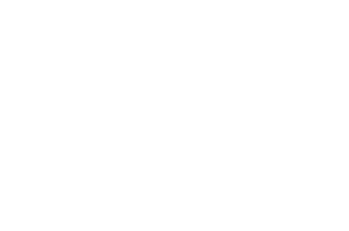

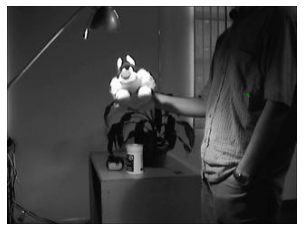

48 49


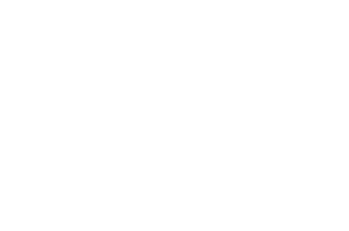

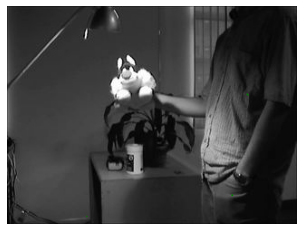

49 50


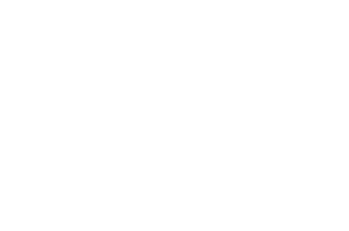

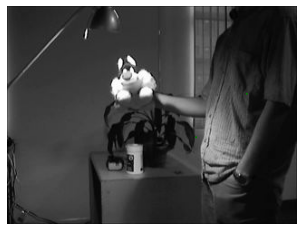

50 51


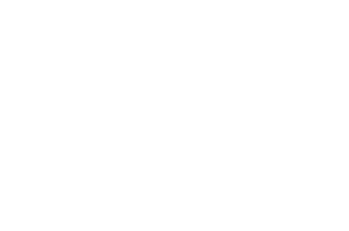

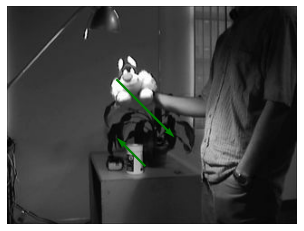

51 52


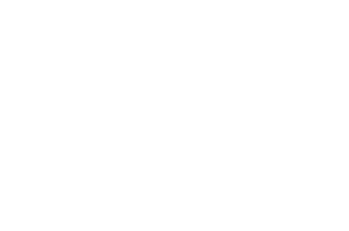

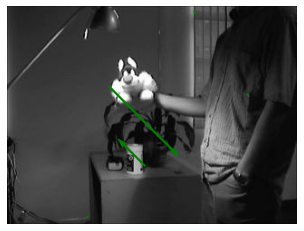

52 53


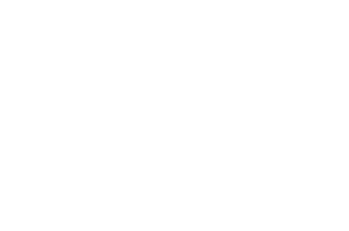

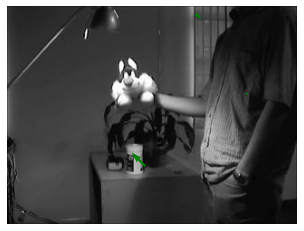

53 54


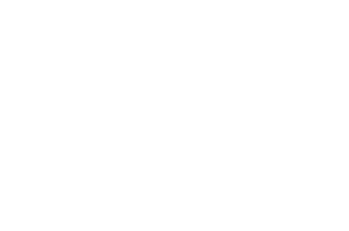

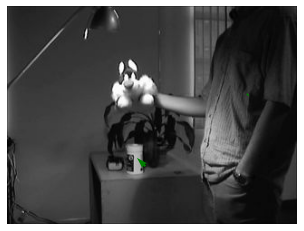

54 55


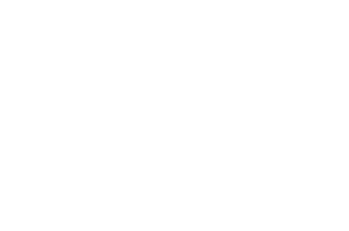

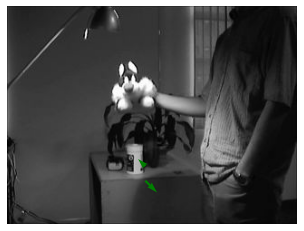

55 56


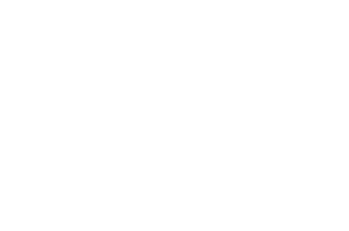

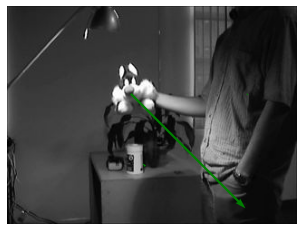

56 57


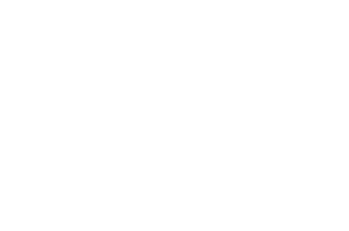

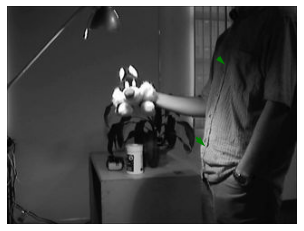

57 58


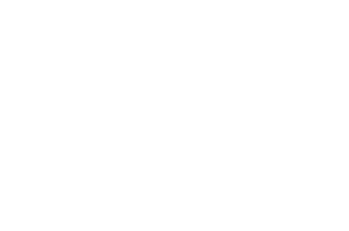

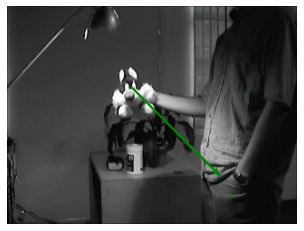

58 59


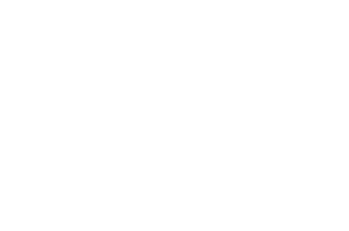

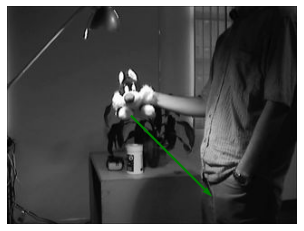

59 60


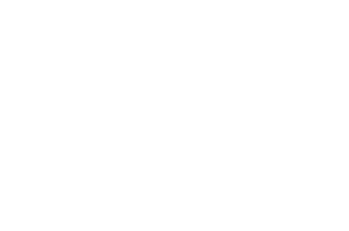

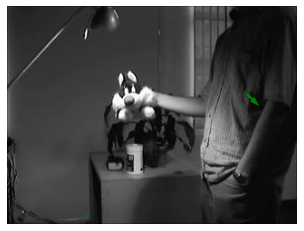

60 61


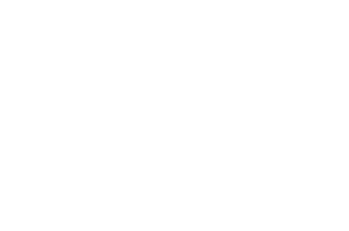

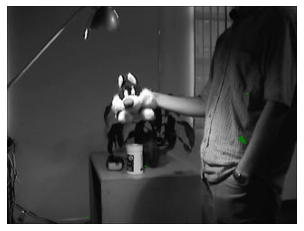

61 62


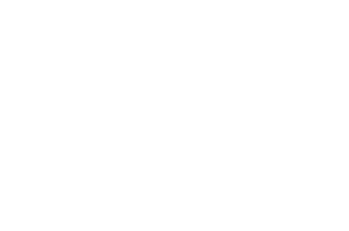

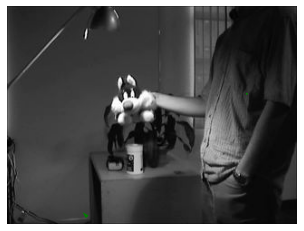

62 63


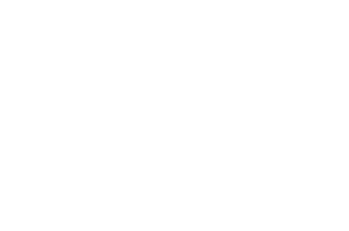

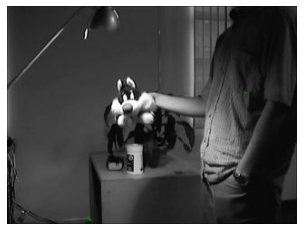

63 64


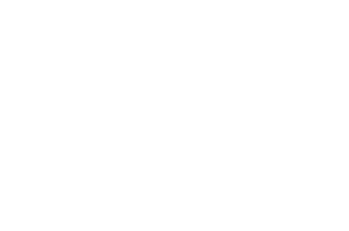

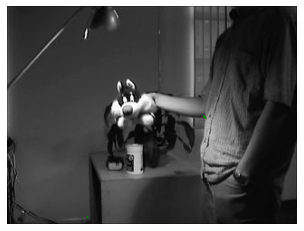

64 65


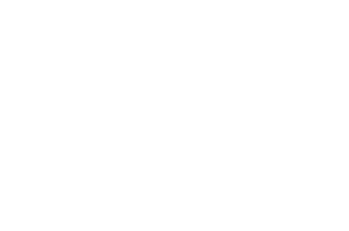

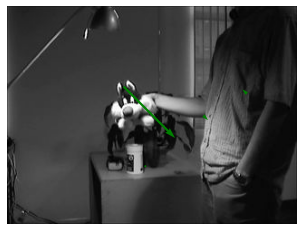

65 66


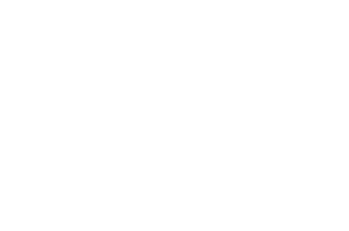

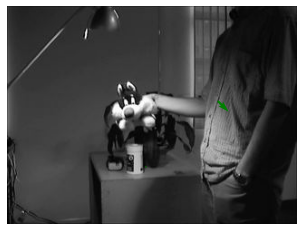

66 67


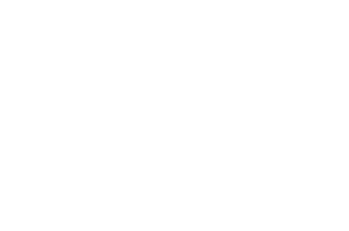

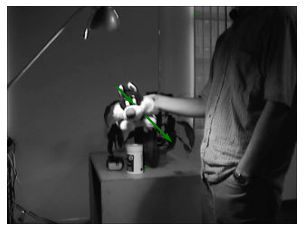

67 68


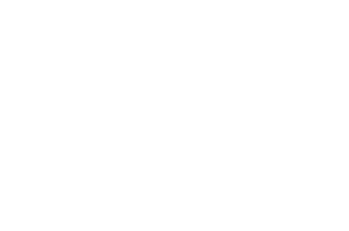

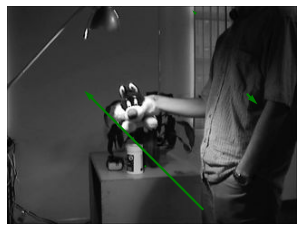

68 69


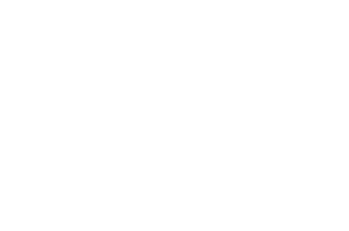

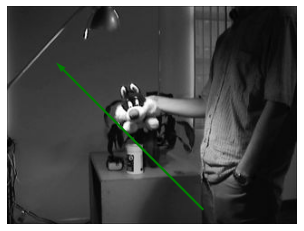

69 70


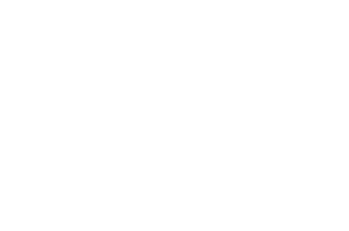

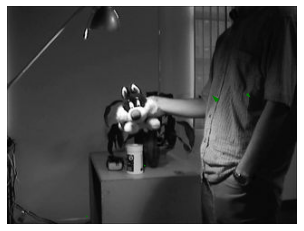

70 71


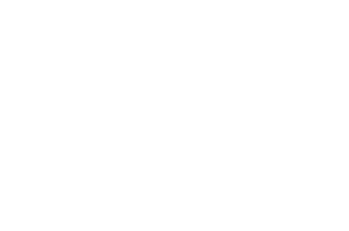

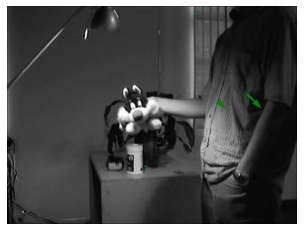

71 72


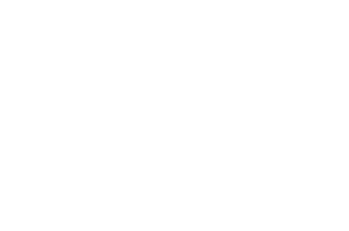

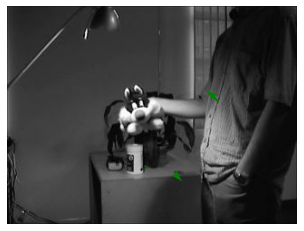

72 73


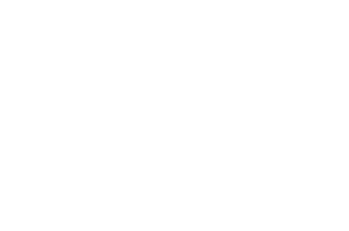

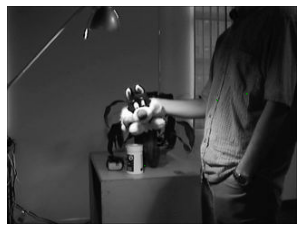

73 74


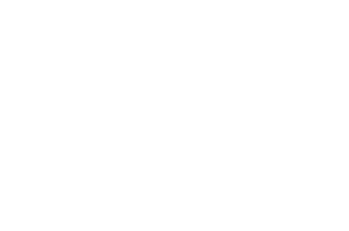

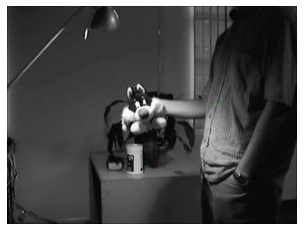

74 75


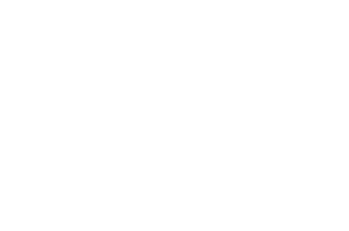

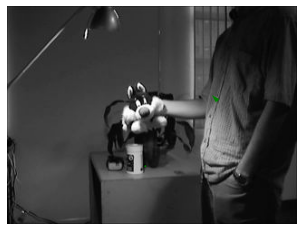

75 76


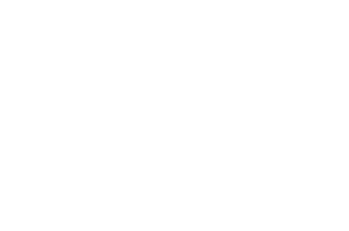

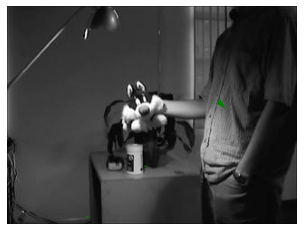

76 77


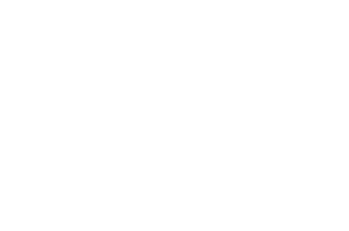

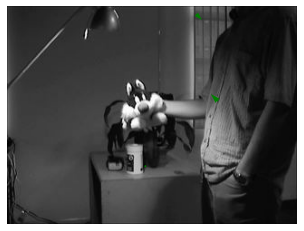

77 78


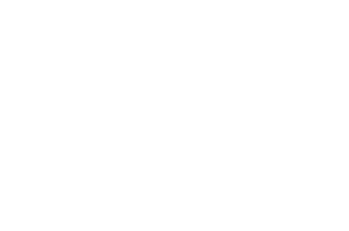

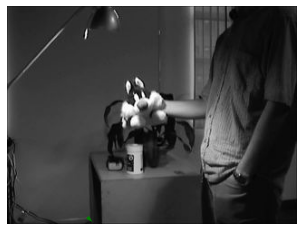

78 79


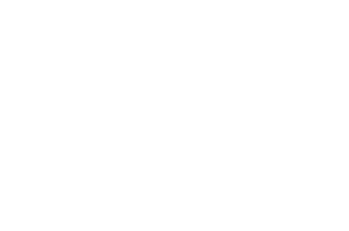

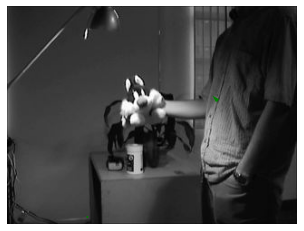

79 80


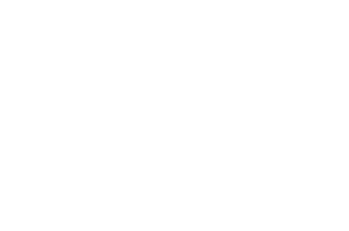

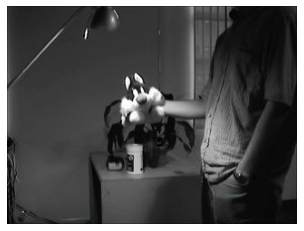

80 81


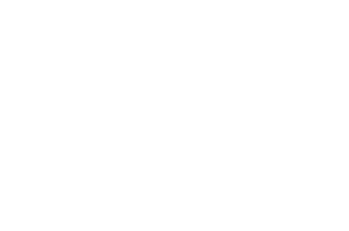

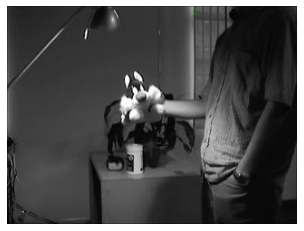

81 82


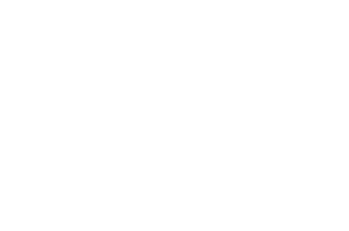

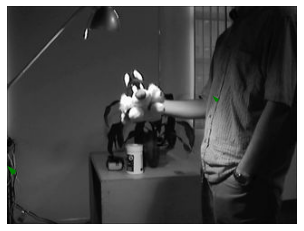

82 83


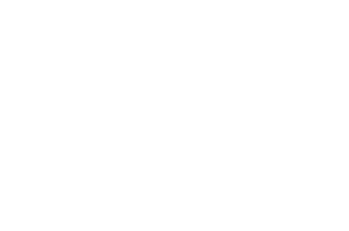

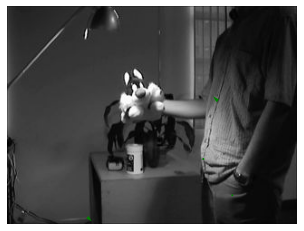

83 84


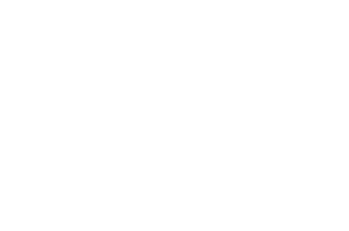

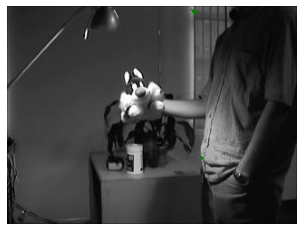

84 85


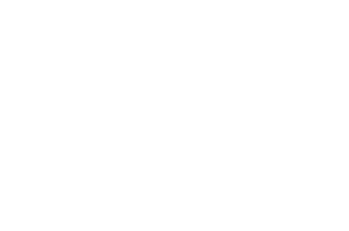

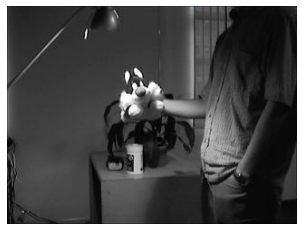

85 86


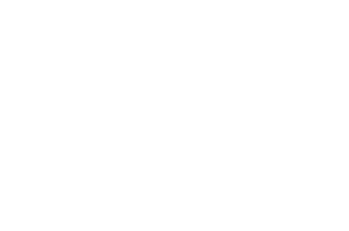

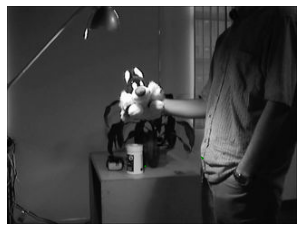

86 87


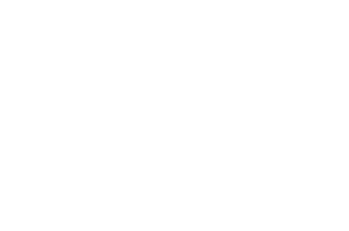

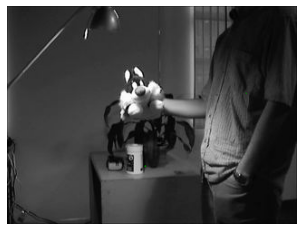

87 88


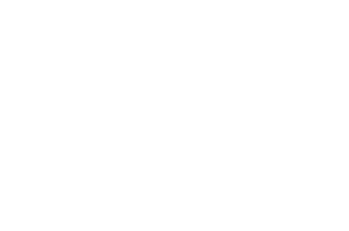

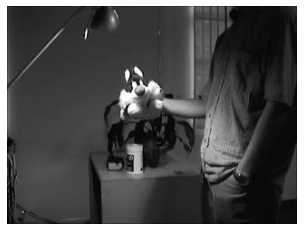

88 89


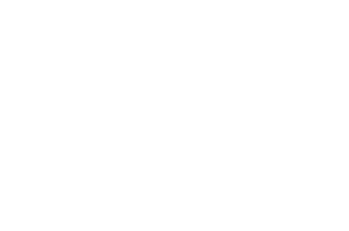

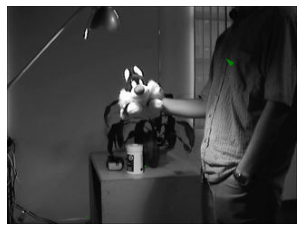

89 90


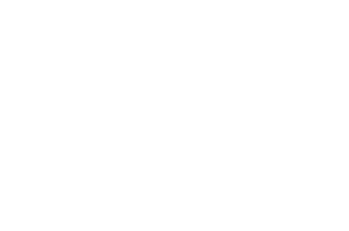

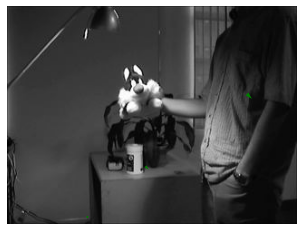

90 91


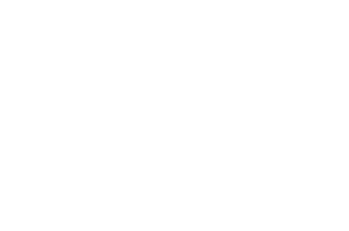

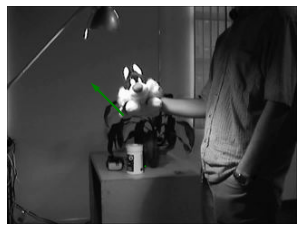

91 92


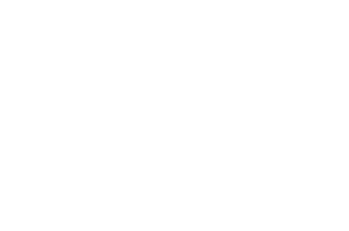

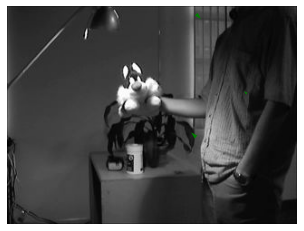

92 93


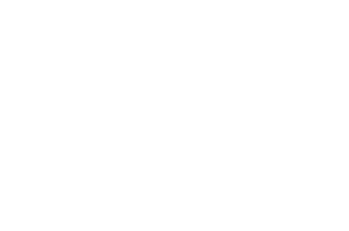

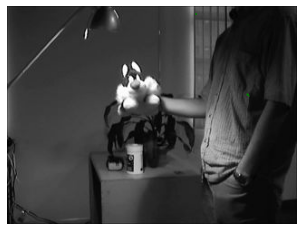

93 94


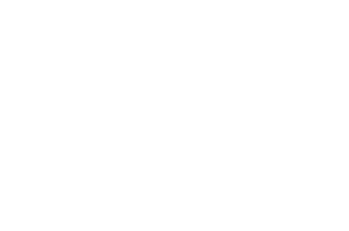

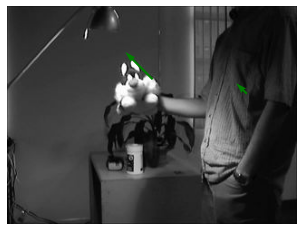

94 95


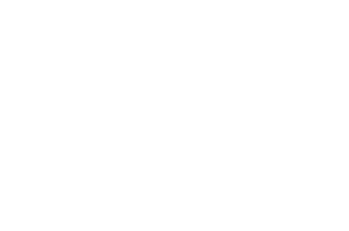

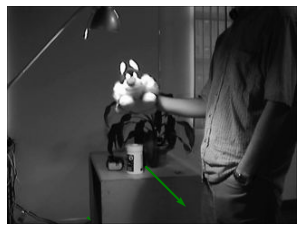

95 96


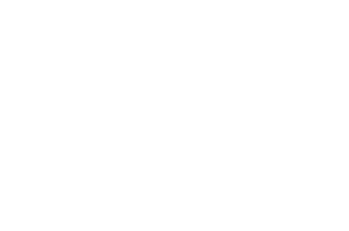

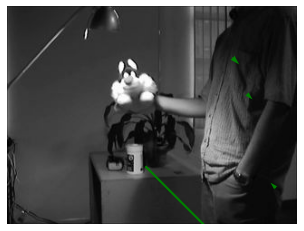

96 97


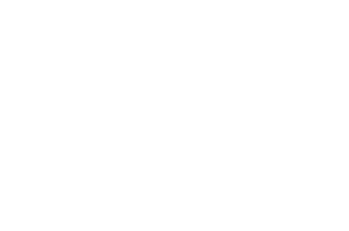

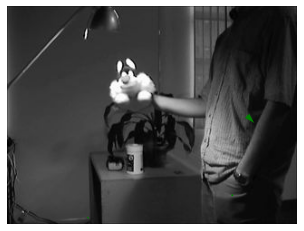

97 98


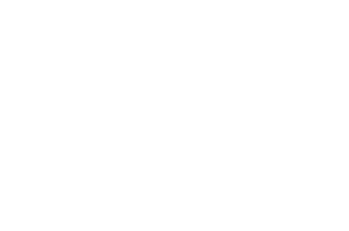

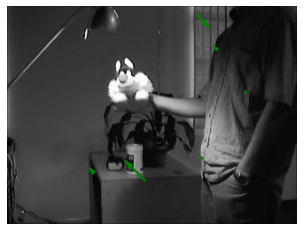

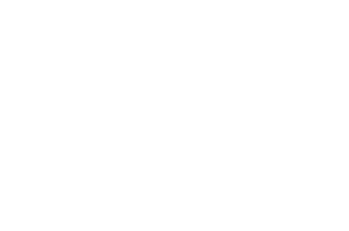

In [3]:


#send first and second frame for tracking 
img1 = x_train[0]
movie = []
for i in range(0,(len(x_train)-2)):
  print(i,i+1)
  # modify images for of and blur 
  U, V = of_flow( x_train[i], x_train[i+1], w=15, min_quality=0.01)
  #got u, v for first set of image 0, image 1 
  #now add it to a numpy array and plot it 
  frame = cv2.imread(imgs_path[i])
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  line_color = (0, 255, 0) #  Green
  res = draw_quiver2(U,V,frame,i)

  movie.append(res)

#use movie list to obtain movie 

movie2 = np.stack(movie)

def _save_video(filename, array, fps=5):
    f, height, width, c = array.shape
    fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
    out = cv2.VideoWriter(filename, fourcc, fps, (width, height))
    for i in range(f):
        out.write(array[i, :, :, ::-1])

_save_video("of_flow_output_video.avi", movie2, fps=3)
